In [3]:
#### This file contains the implementation of Boosting the Decision Tree using AdaboostingClassifier
#### for the Digit Recognition Dataset.
#### A detailed analysis is given step by step on how to determine an optimal n_estimator which is the number of iterations for the Adaboosting classifier.
#### The following libraries are used for this implementation.
#### @Author:Chaitanya Sri Krishna Lolla.
import csv
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

## This is responsible for formation of the input data.
with open('optdigits_raining.csv') as trainingFile:
    reader = csv.reader(trainingFile)
    X= []
    Y= []
    
    for row in reader:
        X.append(row[:64])
        Y.append(row[64])
    

for i in range(0,len(X)):
    lst = X[i]
    for j in range(0,len(lst)):
        lst[j] = int(lst[j])
    X[i] = lst
for i in range(0,len(Y)):
    Y[i] = int(Y[i])

print("Done with Loading the Training Data.")

Done with Loading the Training Data.


In [4]:
### The above training dataset is split into two folds for n_estimator tuning.
### The first fold contains 70% of the Training dataset and remaning 30% of the data is used for Cross Validation.
### The below code is responsible for forming the Training and Validation datasets into two folds Fold1 and Fold 2.
import math
length_TrainingSet = len(X)
percentage_training = 0.7
len_train = math.floor(length_TrainingSet * percentage_training);

X_train = X[:len_train]
Y_train = Y[:len_train]
print("Done with forming the Fold 1 for Training Dataset.")

X_validation = X[len_train:len(X)]
Y_validation = Y[len_train:len(Y)]
print("Done with forming the Fold 2 for Validation Dataset.")

Done with forming the Fold 1 for Training Dataset.
Done with forming the Fold 2 for Validation Dataset.


In [5]:
#### For the estimator values from 50 to 400, the tuning is being done.
estimators = [50,100,150,200,250,300,350,400]
accr_training = []
accr_validation = []
error_validation = []
error_training = []
for i in range(0,len(estimators)):
    estValue = estimators[i]
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=estValue,learning_rate=0.01)
    clf = clf.fit(X_train,Y_train)
    print("Classification is Done.")

    ## Formation of the Errors and Accuracies of Training dataset.
    output_Predicted = clf.predict(X_train);
    accuracy_training = metrics.accuracy_score(output_Predicted,Y_train)
    print("Accuracy on the Training Data set with estimator value %d:" % estValue)
    print(accuracy_training* 100)
    err = 1.0 - accuracy_training
    accr_training.append(accuracy_training)
    error_training.append(err)

    ## Formation of the Errors and Accuracies of the Validation Dataset.
    output_predicted_validation = clf.predict(X_validation)
    accuracy_2ndFold = metrics.accuracy_score(output_predicted_validation,Y_validation)
    print("Accuracy on the Validation Data set is with estimator value %d: " % estValue)
    print(accuracy_2ndFold * 100)
    err_validation = 1.0 - accuracy_2ndFold;
    accr_validation.append(accuracy_2ndFold)
    error_validation.append(err_validation)

Classification is Done.
Accuracy on the Training Data set with estimator value 50:
100.0
Accuracy on the Validation Data set is with estimator value 50: 
92.502179599
Classification is Done.
Accuracy on the Training Data set with estimator value 100:
100.0
Accuracy on the Validation Data set is with estimator value 100: 
92.7637314734
Classification is Done.
Accuracy on the Training Data set with estimator value 150:
100.0
Accuracy on the Validation Data set is with estimator value 150: 
94.0714908457
Classification is Done.
Accuracy on the Training Data set with estimator value 200:
100.0
Accuracy on the Validation Data set is with estimator value 200: 
93.8971229294
Classification is Done.
Accuracy on the Training Data set with estimator value 250:
100.0
Accuracy on the Validation Data set is with estimator value 250: 
95.1176983435
Classification is Done.
Accuracy on the Training Data set with estimator value 300:
100.0
Accuracy on the Validation Data set is with estimator value 300

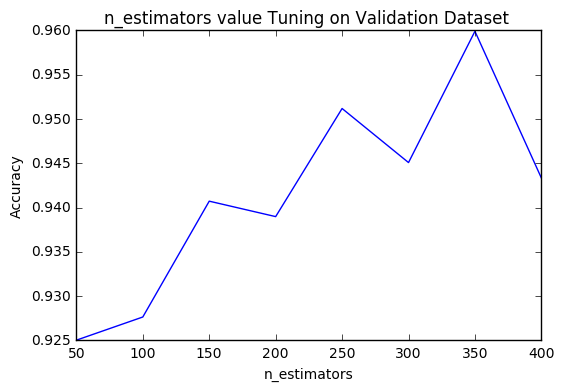

In [6]:
### From the above we can determine the performance of the value n_estimators.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
accr_validation = np.array(accr_validation)
plt.plot(estimators, accr_validation)
plt.title("n_estimators value Tuning on Validation Dataset ")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

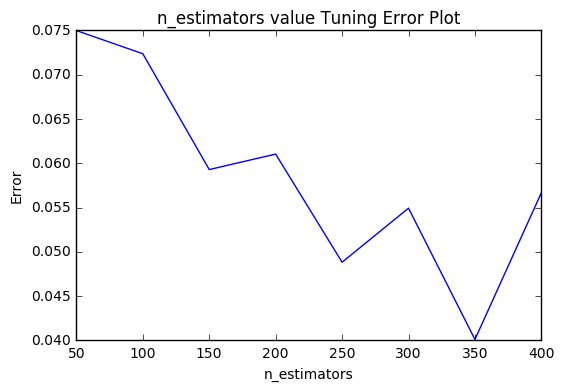

In [7]:
### From the above we can determine the performance of the value n_estimators by plotting the Error Plot.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
err_validation = np.array(error_validation)
plt.plot(estimators, err_validation)
plt.title("n_estimators value Tuning Error Plot")
plt.xlabel("n_estimators")
plt.ylabel("Error")
plt.show()

In [8]:
### From above graph we can say n_estimator value = 350 is giving best accuracy and low error on Validation dataset.
### Hence we will be training with n_estimator = 350.
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=350,learning_rate=0.01)
clf = clf.fit(X_train,Y_train)
print("Classification is Done.")

Classification is Done.


In [9]:
### This code is responsible for formation of the Testing dataset.
with open('optdigits_test.csv') as testingFile:
    reader = csv.reader(testingFile)
    
    X_test=[]
    Y_test=[]
    
    for row in reader:
        X_test.append(row[:64])
        Y_test.append(row[64])
        
for i in range(0,len(X_test)):
    lst = X_test[i]
    for j in range(0,len(lst)):
        lst[j] = float(int(lst[j]))
    X_test[i] = lst
for j in range(0,len(Y_test)):
    Y_test[j] = float(int(Y_test[j]))

print("Done forming the Testing Dataset.")


### Prediction of the Testing dataset.
output_predicted_testing = clf.predict(X_test)
accuracy_testing = metrics.accuracy_score(output_predicted_testing, Y_test)
print("Accuracy on the Testing Dataset is : ")
print(accuracy_testing*100)

Done forming the Testing Dataset.
Accuracy on the Testing Dataset is : 
92.8213689482
